## Project 1: NASA's hazardous objects


# Potentialy Hazardous Objects

Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid’s potential to make threatening close approaches to the Earth. Specifically, all asteroids with a minimum orbit intersection distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less are considered PHAs (Jet Propulsion Laboratory, NASA).

An astronomical unit is the average distance between the Earth and the Sun, meaning that 0.05 au 7.5 Million Km

The Absolute Magnitude is a measure of the luminosity of a celestial body on a inverse logaritmic scale. i.e. Venus has a magnitude of -5, Jupiter has a luminosity of -3, Pluton have a magnitude of 14, meanwhile the small asteroids have a magitud above 22.

We will be focusoing on the objects with a proximity equal or less than 0.05 au and a magnitude below 22.

In [3]:
# Dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st 
import csv 


In [4]:
# Data files
objects_path = "./neo_v2.csv"


# Read the data 
objects_data = pd.read_csv(objects_path)
objects_data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
len(objects_data)

90836

In [6]:
n = objects_data['id'].nunique()
n

27423

In [7]:
unique_df = objects_data.groupby(by = 'id')['miss_distance'].min().reset_index()
unique_df.head()
x = unique_df['id'].nunique()


In [8]:
unique_objects_df = pd.merge(unique_df, objects_data, how = 'inner', on = ['id', 'miss_distance'])
unique_objects_df


,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2000433,2.672952e+07,433 Eros (A898 PA),23.043847,51.527608,21402.705247,Earth,False,10.310,False
1,2000719,4.258288e+07,719 Albert (A911 TB),2.044349,4.571303,27551.597194,Earth,False,15.570,False
2,2001036,5.372124e+07,1036 Ganymed (A924 UB),37.892650,84.730541,51496.923293,Earth,False,9.230,False
3,2001566,8.053782e+06,1566 Icarus (1949 MA),1.427431,3.191832,108801.296374,Earth,False,16.350,True
4,2001580,3.557394e+07,1580 Betulia (1950 KA),3.065879,6.855513,105157.775851,Earth,False,14.690,False
...,...,...,...,...,...,...,...,...,...,...
27418,54275849,2.211065e+07,(2022 GL5),0.199965,0.447136,97087.784087,Earth,False,20.618,False
27419,54275852,1.781882e+07,(2022 GO5),0.045264,0.101214,27826.213807,Earth,False,23.844,False
27420,54275853,9.777491e+06,(2022 GP5),0.056022,0.125268,42604.694355,Earth,False,23.381,False
27421,54275865,1.895127e+04,(2022 GQ5),0.001227,0.002744,51054.089177,Earth,False,31.678,False


In [9]:
unique_objects_df.drop(columns = ['orbiting_body', 'sentry_object'], inplace = True)
unique_objects_df.to_csv("./unique_objects.csv", index_label="index")

### Statistics 

In [10]:
miss_s = unique_objects_df['miss_distance'].agg(['mean', 'median', 'var', 'std', 'sem'])
miss_s

mean      1.770540e+07
median    1.145114e+07
var       2.972905e+14
std       1.724212e+07
sem       1.041197e+05
Name: miss_distance, dtype: float64

In [11]:
velocity_s = unique_objects_df['relative_velocity'].agg(['mean', 'median', 'var', 'std', 'sem'])
velocity_s

mean      4.285946e+04
median    3.792331e+04
var       5.709828e+08
std       2.389525e+04
sem       1.442959e+02
Name: relative_velocity, dtype: float64

In [12]:
magnitude_s = unique_objects_df['absolute_magnitude'].agg(['mean', 'median', 'var', 'std', 'sem'])
magnitude_s

mean      23.361668
median    23.600000
var        8.236446
std        2.869921
sem        0.017331
Name: absolute_magnitude, dtype: float64

In [13]:
dia_min_s =  unique_objects_df['est_diameter_min'].agg(['mean', 'median', 'var', 'std', 'sem'])
dia_min_s

mean      0.139082
median    0.050647
var       0.140191
std       0.374420
sem       0.002261
Name: est_diameter_min, dtype: float64

In [14]:
dia_max_s =  unique_objects_df['est_diameter_max'].agg(['mean', 'median', 'var', 'std', 'sem'])
dia_max_s

mean      0.310996
median    0.113250
var       0.700953
std       0.837229
sem       0.005056
Name: est_diameter_max, dtype: float64

In [15]:
summary_df = pd.DataFrame({
    'miss_distance' : miss_s,
    'relative_velocity' : velocity_s,
    'absolute_magnitude' : magnitude_s,
    'est_diameter_min' : dia_min_s,
    'est_diameter_max' : dia_max_s,
})
summary_df

,miss_distance,relative_velocity,absolute_magnitude,est_diameter_min,est_diameter_max
mean,1.770540e+07,4.285946e+04,23.361668,0.139082,0.310996
median,1.145114e+07,3.792331e+04,23.600000,0.050647,0.113250
var,2.972905e+14,5.709828e+08,8.236446,0.140191,0.700953
std,1.724212e+07,2.389525e+04,2.869921,0.374420,0.837229
sem,1.041197e+05,1.442959e+02,0.017331,0.002261,0.005056


### Graphs
- Pie: hazardous Y
- Pie: % of objects in the distance rangs
- Pie: % of objects in the magnitude range
- Bar: 10 objects closer to Earth that are Hazardous
- Bar: 10 objects with more Magnitude that are Hazardous
- Scatter: The relationship between the objects in the ditance ragne and the magnitude range
- Box (complete df): Variation in the distance and the Magnitude population
- Box (true df): Variation in the distance and the Magnitude Sample


False    25250
True      2173
Name: hazardous, dtype: int64

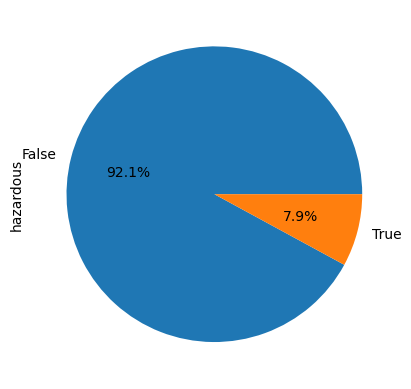

In [34]:
hazardous = unique_objects_df['hazardous'].value_counts()
hazardous.plot.pie(autopct = '%1.1f%%')
plt.show()

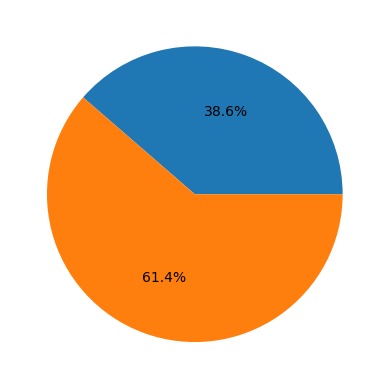

In [23]:
distance_true = unique_objects_df[unique_objects_df['miss_distance'] <= 7500000].value_counts()
distance_false = unique_objects_df[unique_objects_df['miss_distance'] >= 7500000].value_counts()

dist_true_len = len(distance_true)
dist_false_len = len(distance_false)
distance = [dist_true_len, dist_false_len]

plt.pie(distance, autopct = '%1.1f%%')
plt.show()



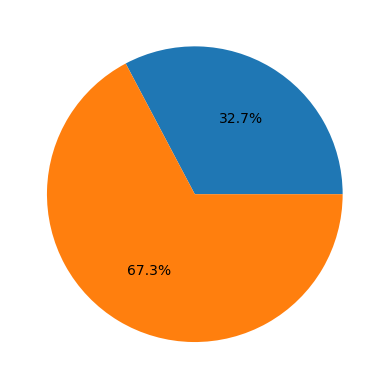

In [24]:
magnitude_true = unique_objects_df[unique_objects_df['absolute_magnitude'] <= 22].value_counts()
magnitude_false = unique_objects_df[unique_objects_df['absolute_magnitude'] >= 22].value_counts()

mag_true_len = len(magnitude_true)
mag_false_len = len(magnitude_false)
magnitude = [mag_true_len, mag_false_len]

plt.pie(magnitude, autopct = '%1.1f%%')
plt.show()

In [45]:
hazardous_df = unique_objects_df[unique_objects_df['hazardous'] == True].reset_index(drop=True)

closest = hazardous_df.nsmallest(10, 'miss_distance')
closest

,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,absolute_magnitude,hazardous
1777,3789399,143272.707499,(2017 VW13),0.192555,0.430566,40792.770407,20.70,True
324,2308635,324930.657662,308635 (2005 YU55),0.124324,0.277997,49379.390941,21.65,True
762,2612901,432438.389028,612901 (2004 XP14),0.291444,0.651688,62664.322601,19.80,True
956,3263453,432438.418948,(2004 XP14),0.350393,0.783502,62664.322585,19.40,True
1572,3729835,486807.131877,(2015 TB145),0.260949,0.583499,125807.719190,20.04,True
2091,54161861,518534.386699,(2021 MK1),0.144729,0.323623,38017.458288,21.32,True
868,3131063,526974.354449,(2002 NY40),0.421265,0.941976,75226.687788,19.00,True
1072,3388315,554168.778850,(2007 TU24),0.231502,0.517654,33294.250592,20.30,True
1268,3564590,624155.584206,(2011 JA),0.146068,0.326618,81864.415828,21.30,True
838,3102719,832144.928659,(2001 YB5),0.175612,0.392681,110118.237589,20.90,True


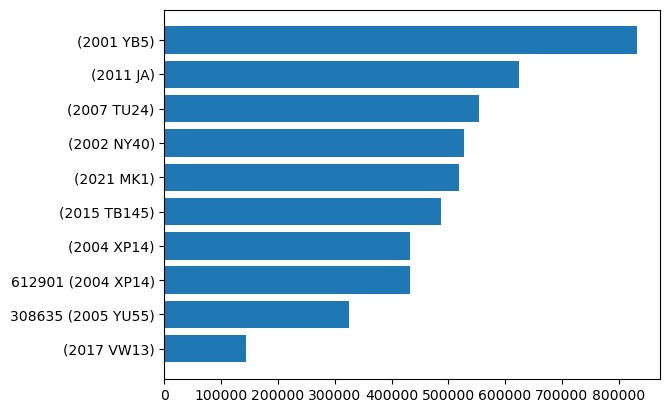

In [48]:
plt.barh(closest['name'], closest['miss_distance'])
plt.show()

In [46]:
hazardous_df = unique_objects_df[unique_objects_df['hazardous'] == True].reset_index(drop=True)

brigthest = hazardous_df.nsmallest(10, 'absolute_magnitude')
brigthest

,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,absolute_magnitude,hazardous
8,2003122,7.066521e+06,3122 Florence (1981 ET3),4.135757,9.247833,48724.636424,14.04,True
16,2004183,1.822481e+07,4183 Cuno (1959 LM),3.967848,8.872377,51827.192086,14.13,True
9,2003200,1.031203e+07,3200 Phaethon (1983 TB),3.503926,7.835018,114797.864507,14.40,True
44,2016960,3.847356e+07,16960 (1998 QS52),3.439973,7.692012,103209.942960,14.44,True
273,2242450,2.441048e+07,242450 (2004 QY2),2.954983,6.607543,96045.735019,14.77,True
96,2089830,6.350303e+07,89830 (2002 CE),2.682594,5.998463,101571.176418,14.98,True
22,2004953,1.598166e+07,4953 (1990 MU),2.633631,5.888979,84339.115906,15.02,True
114,2137427,6.216949e+07,137427 (1999 TF211),2.457848,5.495915,105547.369460,15.17,True
3,2001981,1.339977e+07,1981 Midas (1973 EA),2.401900,5.370812,95427.601890,15.22,True
6,2002201,5.533405e+07,2201 Oljato (1947 XC),2.368945,5.297122,69559.721293,15.25,True


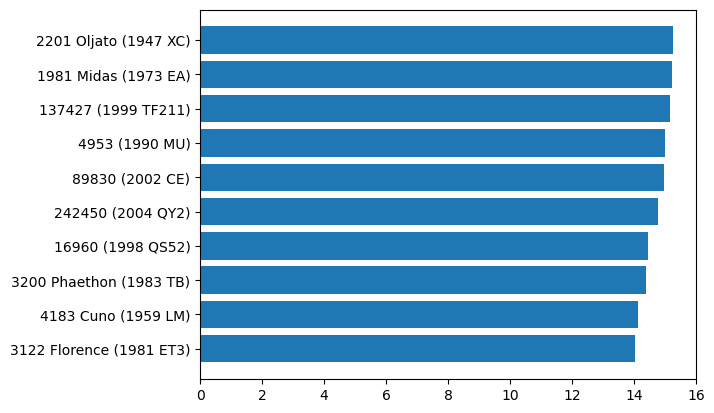

In [49]:
plt.barh(brigthest['name'], brigthest['absolute_magnitude'])
plt.show()

In [57]:
brigthest100 = hazardous_df.nsmallest(100, 'absolute_magnitude')
brigthest100

,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,absolute_magnitude,hazardous
8,2003122,7.066521e+06,3122 Florence (1981 ET3),4.135757,9.247833,48724.636424,14.04,True
16,2004183,1.822481e+07,4183 Cuno (1959 LM),3.967848,8.872377,51827.192086,14.13,True
9,2003200,1.031203e+07,3200 Phaethon (1983 TB),3.503926,7.835018,114797.864507,14.40,True
44,2016960,3.847356e+07,16960 (1998 QS52),3.439973,7.692012,103209.942960,14.44,True
273,2242450,2.441048e+07,242450 (2004 QY2),2.954983,6.607543,96045.735019,14.77,True
...,...,...,...,...,...,...,...,...
276,2243566,2.810353e+07,243566 (1995 SA),0.900648,2.013910,51185.459636,17.35,True
214,2164400,7.717062e+06,164400 (2005 GN59),0.888290,1.986278,38080.651264,17.38,True
274,2242643,9.579845e+06,242643 (2005 NZ6),0.888290,1.986278,117596.816842,17.38,True
137,2143649,1.473743e+07,143649 (2003 QQ47),0.880147,1.968067,108820.032433,17.40,True


In [60]:
closest100 = hazardous_df.nsmallest(100, 'miss_distance')
closest100

,id,miss_distance,name,est_diameter_min,est_diameter_max,relative_velocity,absolute_magnitude,hazardous
1777,3789399,1.432727e+05,(2017 VW13),0.192555,0.430566,40792.770407,20.70,True
324,2308635,3.249307e+05,308635 (2005 YU55),0.124324,0.277997,49379.390941,21.65,True
762,2612901,4.324384e+05,612901 (2004 XP14),0.291444,0.651688,62664.322601,19.80,True
956,3263453,4.324384e+05,(2004 XP14),0.350393,0.783502,62664.322585,19.40,True
1572,3729835,4.868071e+05,(2015 TB145),0.260949,0.583499,125807.719190,20.04,True
...,...,...,...,...,...,...,...,...
343,2341843,3.231298e+06,341843 (2008 EV5),0.265800,0.594347,15872.743185,20.00,True
931,3184151,3.241034e+06,(2004 MD),0.242412,0.542051,44357.597482,20.20,True
758,2612780,3.241034e+06,612780 (2004 MD),0.241299,0.539560,44357.597411,20.21,True
902,3160741,3.241280e+06,(2003 SS84),0.116026,0.259442,45511.654894,21.80,True


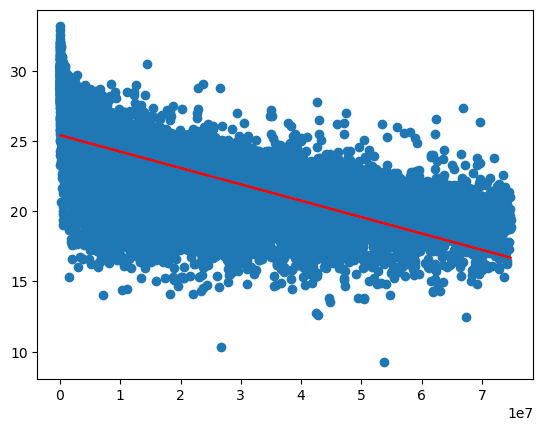

-1.1685112391712937e-07 25.430564301822937 -0.7020264998660326 0.0 7.158297166152405e-10


In [65]:
plt.scatter(unique_objects_df['miss_distance'], unique_objects_df['absolute_magnitude'])
slope, intercept, rvalue, pvalue, stderr = st.linregress(unique_objects_df['miss_distance'], unique_objects_df['absolute_magnitude'])

all_y = slope * unique_objects_df['miss_distance'] + intercept
plt.plot(unique_objects_df['miss_distance'], all_y, color = 'red')
plt.show()
print(slope, intercept, rvalue, pvalue, stderr)

-3.6824359500639935e-09 16.517154439416657 -0.08299308102582786 0.4116952303627551 4.466624292480375e-09


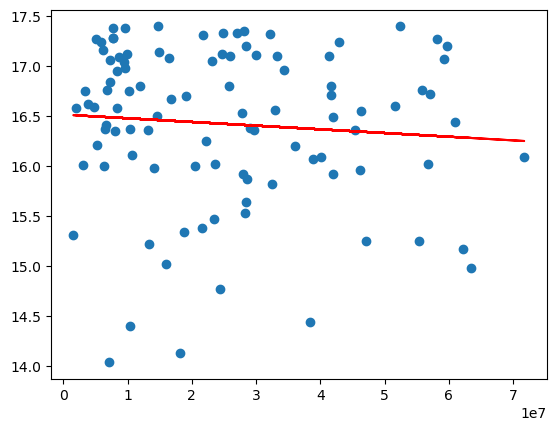

In [69]:
plt.scatter(brigthest100['miss_distance'], brigthest100['absolute_magnitude'])
slope, intercept, rvalue, pvalue, stderr = st.linregress(brigthest100['miss_distance'], brigthest100['absolute_magnitude'])
brigthest_y = slope * brigthest100['miss_distance'] + intercept
plt.plot(brigthest100['miss_distance'], brigthest_y, color = 'red')
print(slope, intercept, rvalue, pvalue, stderr)
plt.show()

1.2544695219951306e-07 20.03185579507599 0.07562907985549998 0.4545480280345616 1.6707545968036707e-07


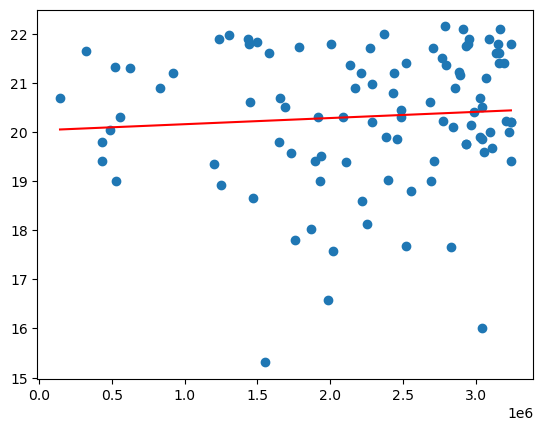

In [70]:
plt.scatter(closest100['miss_distance'], closest100['absolute_magnitude'])
slope, intercept, rvalue, pvalue, stderr = st.linregress(closest100['miss_distance'], closest100['absolute_magnitude'])
closest_y = slope * closest100['miss_distance'] + intercept
plt.plot(closest100['miss_distance'], closest_y, color = 'red')
print(slope, intercept, rvalue, pvalue, stderr)
plt.show()

- Box (true df): Variation in the distance and the Magnitude Sample

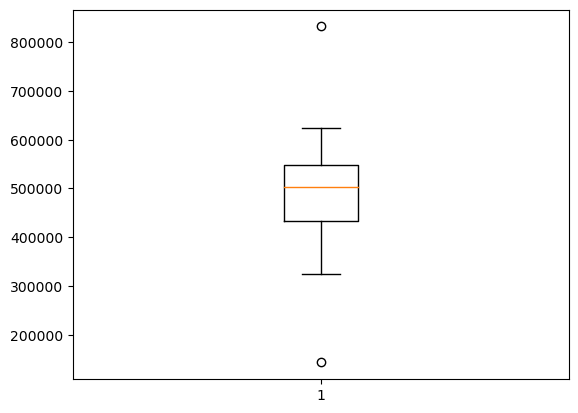

0.25    432438.396508
0.50    502670.759288
0.75    547370.172750
Name: miss_distance, dtype: float64 432438.3965083205 547370.1727500787 487586.53378773166 114931.7762417582 260040.73214568323 719767.837112716 1777    143272.707499
838     832144.928659
Name: miss_distance, dtype: float64


In [78]:
plt.boxplot(closest['miss_distance'])
plt.show()

quartiles = closest['miss_distance'].quantile([0.25, 0.5, 0.75])
lowq = quartiles[0.25]
uppq = quartiles[0.75]
mean = closest['miss_distance'].mean()
iqr = uppq - lowq
lowbound = lowq - (1.5 * iqr)
uppbound = uppq + (1.5 * iqr)
outlier = closest['miss_distance'].loc[(lowbound > closest['miss_distance']) | (closest['miss_distance']> uppbound)]
print(quartiles, lowq, uppq, mean, iqr, lowbound, uppbound, outlier)

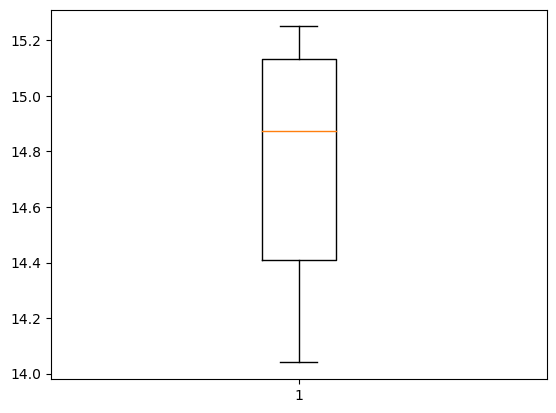

0.25    14.4100
0.50    14.8750
0.75    15.1325
Name: absolute_magnitude, dtype: float64 14.41 15.1325 20.441 0.7225000000000001 13.32625 16.216250000000002 Series([], Name: absolute_magnitude, dtype: float64)


In [79]:
plt.boxplot(brigthest['absolute_magnitude'])
plt.show()
quartiles = brigthest['absolute_magnitude'].quantile([0.25, 0.5, 0.75])
lowq = quartiles[0.25]
uppq = quartiles[0.75]
mean = closest['absolute_magnitude'].mean()
iqr = uppq - lowq
lowbound = lowq - (1.5 * iqr)
uppbound = uppq + (1.5 * iqr)
outlier = brigthest['absolute_magnitude'].loc[(lowbound > brigthest['absolute_magnitude']) | (brigthest['absolute_magnitude']> uppbound)]
print(quartiles, lowq, uppq, mean, iqr, lowbound, uppbound, outlier)